 # <b> Chapter 1

In [410]:
from time import perf_counter
from math import inf
from statistics import mean
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

In [411]:
def time_it(times=100):
    def outer(fn):
        def inner(*args, **kwargs):
            start = perf_counter()
            for _ in range(times):
                result = fn(*args, **kwargs)
            return result, f"Time elapsed: {(perf_counter() - start)/times}"
        return inner
    return outer

## Finding Key Conectors

In [412]:
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"},
]

friendship_pairs = [
    (0, 1),
    (0, 2),
    (1, 2),
    (1, 3),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (5, 7),
    (6, 8),
    (7, 8),
    (8, 9),
]

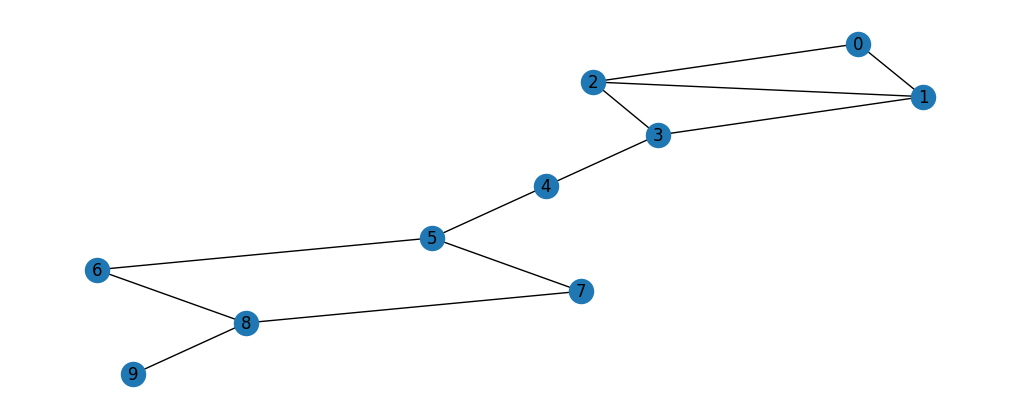

In [413]:
# Ploting the graph

G = nx.Graph()
G.add_nodes_from([(node, {"name": name}) for node, name in users])
G.add_edges_from(friendship_pairs)
G.remove_node("id")

pos = nx.kamada_kawai_layout(G)
fig = plt.figure(1, figsize=(10, 4))
nx.draw(G, pos=pos, with_labels=True)

In [414]:
# Mapping the users and its friends

friends = {user["id"]: set() for user in users}
for u in friends.keys():
    friendships = set(sum([rel for rel in friendship_pairs if u in rel], ()))
    friendships.remove(u)
    friends[u] = friendships

# Finding number of connections based on the newly created mapping

num_con = sum([len(l) for l in friends.values()])
print(
    f"Number of edges: {int(num_con/2)}",
    f"Avg. number of connections: {num_con/len(friends)}",
    sep="\n",
)
friends

Number of edges: 12
Avg. number of connections: 2.4


{0: {1, 2},
 1: {0, 2, 3},
 2: {0, 1, 3},
 3: {1, 2, 4},
 4: {3, 5},
 5: {4, 6, 7},
 6: {5, 8},
 7: {5, 8},
 8: {6, 7, 9},
 9: {8}}

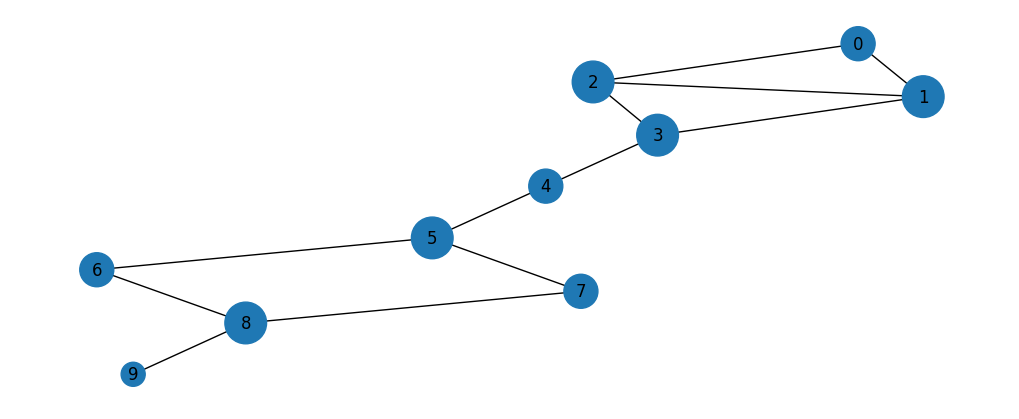

In [415]:
# Plotting the graph of most connected people w/ node sizes based on degree of node.

G = nx.Graph(friends)
fig = plt.figure(1, figsize=(10, 4))
node_sizes = [len(v) for v in friends.values()]
nx.draw(G, pos=pos, with_labels=True, node_size=[300 * size for size in node_sizes])

## Data Scientists You May Know

In [416]:
# From the idea of recomending friends of friends for a user



def friend_friends(user: int, friends: dict) -> set:
    """Returns all the friends of a friend of a user"""
    nearest = friends[user]
    if not nearest:
        return "This user has no friends :c"
    rec = set()
    for f in nearest:
        rec = rec.union(friends[f]).difference(nearest)
        rec.remove(user)
    return rec


def common_friends(u1: int, u2: int, friends: dict) -> set:
    """Returns the common friends of a user"""
    users = friends[u1].union(friends[u2])
    users -= {u1, u2}
    return users


f_user = friend_friends(5, friends)
cf_users = common_friends(0, 1, friends)
print(
    f"Friends of user {5}: {f_user}",
    f"Common friends of users {0} and {1}: {cf_users}",
    sep="\n",
)

Friends of user 5: {8, 3}
Common friends of users 0 and 1: {2, 3}


In [417]:
# Find users with common interests

interests_l = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

# Creates the interest dictionary

interests_d = {k[1]: None for k in interests_l}
for k in interests_d.keys():
    interests_d[k] = [v[0] for v in interests_l if v[1] == k]


In [418]:
# Getting the interests using a list

@time_it()
def in_common_1(interest: str, interests: list) -> list:
    """Gets all people with common interests using lists and tuples"""
    filt = filter(lambda x: x[1] == interest, interests)
    c = [e[0] for e in list(filt)]
    return c

# Getting the interests using a dict 

@time_it()
def in_common_2(interest: str, interests: dict) -> list:
    """Gets all people with common interests using dicts"""
    return interests.get(interest)


print(in_common_1("Python", interests_l), in_common_2("Python", interests_d), sep='\n')

([2, 3, 5], 'Time elapsed: 4.201699979603291e-05')
([2, 3, 5], 'Time elapsed: 1.0499998461455107e-06')


## Salaries and Experience

In [419]:
salaries_and_tenures = [
    (83000, 8.7),
    (88000, 8.1),
    (48000, 0.7),
    (76000, 6),
    (69000, 6.5),
    (76000, 7.5),
    (60000, 2.5),
    (83000, 10),
    (48000, 1.9),
    (63000, 4.2),
]

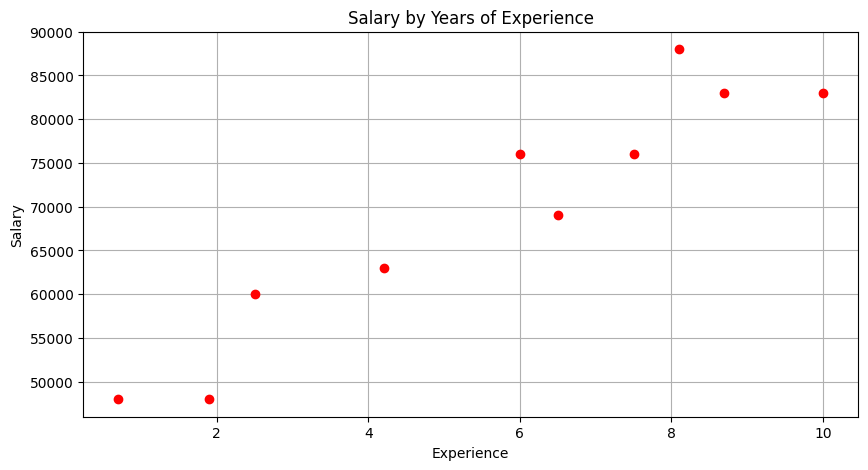

In [420]:
# Ploting the salaries

plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Salary by Years of Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid(True)
y, x = ([e[0] for e in salaries_and_tenures], [e[1] for e in salaries_and_tenures])
plt.plot(x, y, 'ro')
plt.show()

In [421]:
# Bucketing salaries by years of experience


def bucketing(values: dict, stepping: tuple = (0, 12, 2)) -> dict:
    """Creates a distribution of buckets based on years of experience and distributes salaries according to them"""
    bucket = {k: [] for k in np.arange(*stepping)}
    for k in bucket:
        bucket[k] = [v[0] for v in values if v[1] >= k and v[1] <= k+stepping[2]]
    return bucket

def avg_sal_exp(salaries: dict) -> dict:
    """Calculates the average of the salaries per range of years of experience"""
    for s in salaries:
        salaries[s] = mean(salaries[s])
    return salaries

dist = bucketing(salaries_and_tenures)
avg_sal = avg_sal_exp(dist)


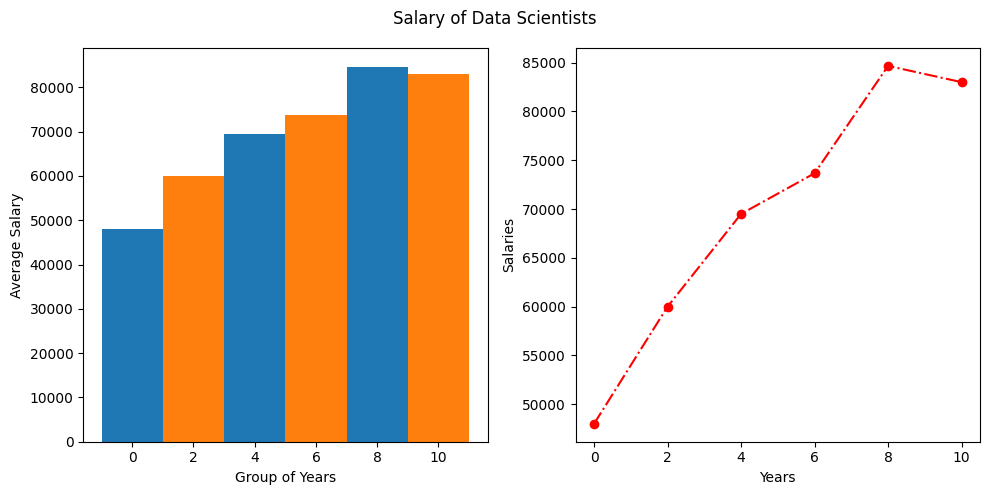

In [422]:
# Ploting the average and distributions

fig, ax = plt.subplots(ncols=2, nrows=1)
ax[0].set_xlabel("Group of Years")
ax[0].set_ylabel("Average Salary")
ax[1].set_xlabel("Years")
ax[1].set_ylabel("Salaries")
ax[0].bar(avg_sal.keys(), avg_sal.values(), width=2, color=['tab:blue', 'tab:orange'])

ax[1].plot(dist.keys(), dist.values(), 'r-.o')
fig.suptitle("Salary of Data Scientists")
fig.tight_layout()
plt.show()